In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch

In [2]:
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:18: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [3]:
# List of available models in PyTorch Hub from Nvidia/DeepLearningExamples
torch.hub.list('NVIDIA/DeepLearningExamples:torchhub')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


['nvidia_convnets_processing_utils',
 'nvidia_efficientnet',
 'nvidia_efficientnet_b0',
 'nvidia_efficientnet_b4',
 'nvidia_efficientnet_widese_b0',
 'nvidia_efficientnet_widese_b4',
 'nvidia_resneXt',
 'nvidia_resnet50',
 'nvidia_resnext101_32x4d',
 'nvidia_se_resnext101_32x4d',
 'nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_tts_utils',
 'nvidia_waveglow']

In [4]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [5]:
!cat /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/hubconf.py

import os
import sys

from PyTorch.Detection.SSD.ssd import nvidia_ssd, nvidia_ssd_processing_utils
sys.path.append(os.path.join(sys.path[0], 'PyTorch/Detection/SSD'))

from PyTorch.Classification.ConvNets.image_classification.models import resnet50 as nvidia_resnet50
from PyTorch.Classification.ConvNets.image_classification.models import resnext101_32x4d as nvidia_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import se_resnext101_32x4d as nvidia_se_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b0 as nvidia_efficientnet_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b4 as nvidia_efficientnet_b4
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b0 as nvidia_efficientnet_widese_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b4 as nvidia_efficientnet_widese_b4
from PyTo

In [6]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [7]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg',
    'https://i.ibb.co/ZVqGsbJ/nvidia-image-300.jpg'
]
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

In [8]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [9]:
print(len(detections_batch))
print(len(detections_batch[0]), detections_batch[0].shape)
print(len(detections_batch[1]), detections_batch[1].shape)

2
4 torch.Size([4, 4, 8732])
4 torch.Size([4, 81, 8732])


In [10]:
results_per_input = utils.decode_results(detections_batch)
print(len(results_per_input), len(results_per_input[0]), 
      results_per_input[1][0].shape, results_per_input[1][1].shape, results_per_input[1][2].shape)

4 3 (20, 4) (20,) (20,)


In [11]:
threshold = 0.3

In [12]:
best_results_per_input = [utils.pick_best(results, threshold) for results in results_per_input]
print(len(best_results_per_input), len(best_results_per_input[0]), 
      best_results_per_input[1][0].shape, best_results_per_input[1][1].shape, best_results_per_input[1][2].shape)

4 3 (1, 4) (1,) (1,)


In [13]:
classes_to_labels = utils.get_coco_object_dictionary()

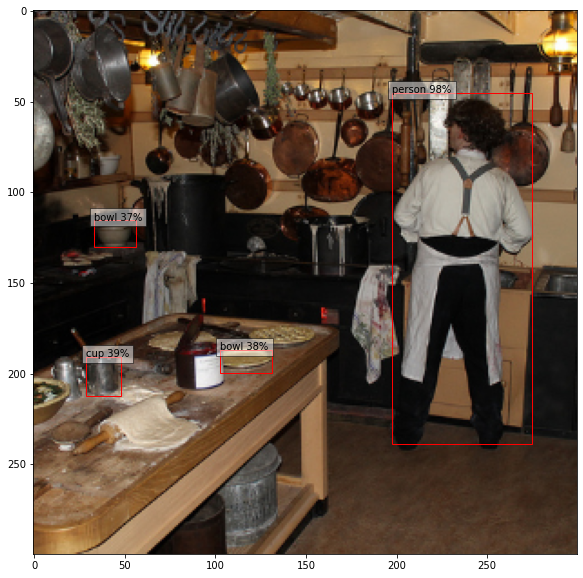

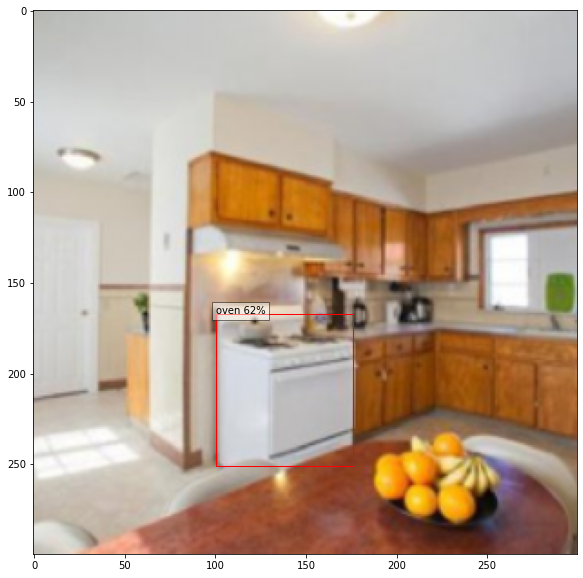

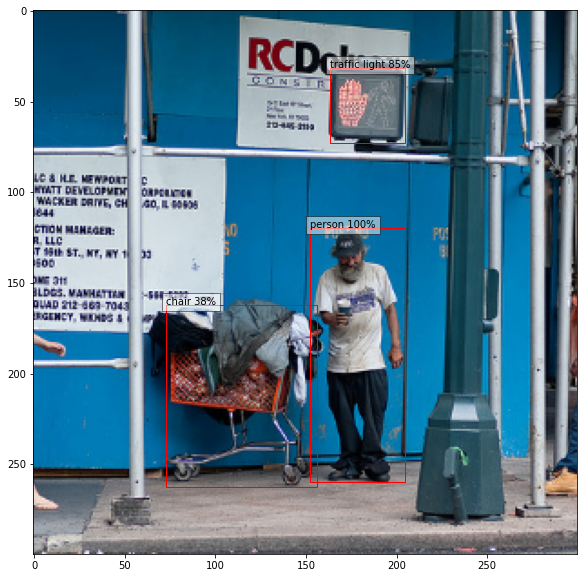

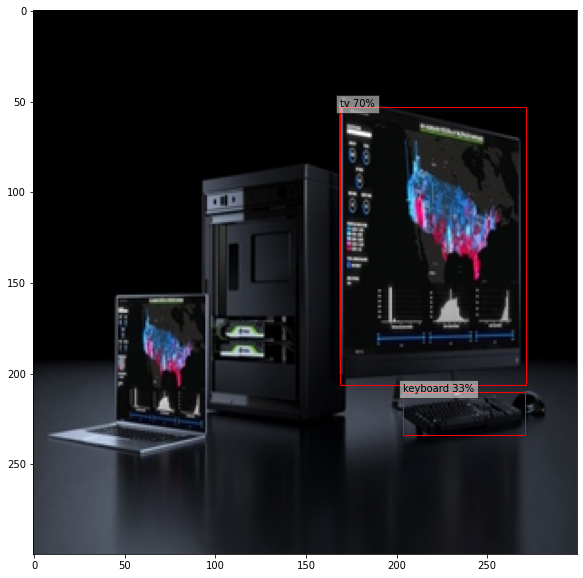

In [14]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1, figsize=(15, 10))
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [15]:
import time
import numpy as np

import torch.backends.cudnn as cudnn
cudnn.benchmark = True

# Helper function to benchmark the model
def benchmark(model, input_shape=(1024, 1, 32, 32), dtype='fp32', nwarmup=50, nruns=1000):
    input_data = torch.randn(input_shape)
    input_data = input_data.to("cuda")
    if dtype=='fp16':
        input_data = input_data.half()

    print("Warm up ...")
    with torch.no_grad():
        for _ in range(nwarmup):
            features = model(input_data)
    torch.cuda.synchronize()
    print("Start timing ...")
    timings = []
    with torch.no_grad():
        for i in range(1, nruns+1):
            start_time = time.time()
            pred_loc, pred_label  = model(input_data)
            torch.cuda.synchronize()
            end_time = time.time()
            timings.append(end_time - start_time)
            if i%100==0:
                print('Iteration %d/%d, avg batch time %.2f ms'%(i, nruns, np.mean(timings)*1000))

    print("Input shape:", input_data.size())
    print("Output location prediction size:", pred_loc.size())
    print("Output label prediction size:", pred_label.size())
    print('Average batch time: %.2f ms'%(np.mean(timings)*1000))

In [16]:
# Model benchmark without TRTorch/TensorRT
model = ssd_model.eval().to("cuda")
benchmark(model, input_shape=(128, 3, 300, 300), nruns=1000)

Warm up ...
Start timing ...
Iteration 100/1000, avg batch time 602.54 ms
Iteration 200/1000, avg batch time 602.55 ms
Iteration 300/1000, avg batch time 602.54 ms
Iteration 400/1000, avg batch time 602.54 ms
Iteration 500/1000, avg batch time 602.53 ms
Iteration 600/1000, avg batch time 602.52 ms
Iteration 700/1000, avg batch time 602.52 ms
Iteration 800/1000, avg batch time 602.52 ms
Iteration 900/1000, avg batch time 602.51 ms
Iteration 1000/1000, avg batch time 602.51 ms
Input shape: torch.Size([128, 3, 300, 300])
Output location prediction size: torch.Size([128, 4, 8732])
Output label prediction size: torch.Size([128, 81, 8732])
Average batch time: 602.51 ms
